In [1]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors



In [2]:

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [3]:

file_url = r'C:\Users\Lenovo\Documents\INDE DATA\MERGEVALUEFOODHOUSEHOLDNSS68.csv'
merge= pd.read_csv(file_url)
#We make a copy of the file and work on it
merge= merge.copy()
merge.columns

Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object')

# A. Encoding 

In [4]:
merge.dtypes


HHID                                 int64
Sector                              object
HH_Size                              int64
Religion                            object
Social_Group                        object
whether_Land_owned                  object
State_code                          object
Regular_salary_earner               object
Possess_ration_card                 object
MPCE_MRP                             int64
Cereal                             float64
Milk & Milk Products               float64
Pulses and Pulse Products          float64
beef / buffalo meat                float64
beer                               float64
chicken                            float64
coffee, tea, juice                 float64
country liquor                     float64
edible oil                         float64
eggs                               float64
fish, prawn                        float64
foreign/ refined liquor or wine    float64
fruits_dry                         float64
fruits_fres

In [6]:
merge.columns


Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object')

In [5]:
merge_encode=merge
merge_encode=merge_encode.drop(['HHID'], axis=1)


## 1. Encoding non-numeric data

In [6]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
for col in ['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP' ]:
    merge_encode[col] = lbl_encoder.fit_transform(merge_encode[col])
merge_encode

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,0,4,1,3,1,22,0,1,26571,750.0,300.0,120.0,140.0,NaN,210.0,130.0,240.0,90.0,24.0,290.0,NaN,20.0,95.0,NaN,120.0,120.0,150.0,142.0,90.0,270.0,NaN,470.0
1,0,1,1,3,1,22,0,1,58863,270.0,212.0,60.0,280.0,200.0,270.0,110.0,NaN,88.0,NaN,170.0,NaN,30.0,80.0,NaN,70.0,120.0,150.0,89.0,59.0,258.0,NaN,390.0
2,0,1,1,3,1,22,0,1,53483,374.0,65.0,60.0,NaN,NaN,100.0,110.0,240.0,90.0,100.0,240.0,NaN,NaN,62.0,NaN,139.0,65.0,160.0,114.0,73.0,300.0,NaN,290.0
3,0,0,3,3,1,22,0,1,74690,140.0,240.0,45.0,140.0,NaN,160.0,80.0,300.0,45.0,NaN,190.0,NaN,NaN,55.0,NaN,60.0,65.0,150.0,57.0,67.0,264.0,NaN,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,NaN,NaN,100.0,145.0,240.0,110.0,46.0,360.0,NaN,NaN,80.0,NaN,105.0,53.0,130.0,141.0,75.0,60.0,NaN,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100492,1,2,3,0,0,26,1,1,75454,576.0,516.0,167.0,NaN,NaN,110.0,408.0,NaN,290.0,69.0,180.0,NaN,NaN,185.0,200.0,55.0,NaN,NaN,80.0,266.0,NaN,NaN,364.0
100493,1,2,3,0,0,26,0,0,79576,610.0,1535.0,222.0,NaN,NaN,220.0,278.0,NaN,195.0,66.0,170.0,NaN,NaN,123.0,NaN,12.0,NaN,NaN,103.0,144.0,1050.0,NaN,214.0
100494,1,5,3,0,1,26,1,1,46144,920.0,1120.0,362.0,NaN,NaN,275.0,427.0,NaN,375.0,96.0,250.0,NaN,NaN,359.0,NaN,235.0,NaN,NaN,79.0,330.0,NaN,NaN,617.0
100495,1,2,3,0,1,26,1,1,58709,593.0,815.0,212.0,NaN,NaN,115.0,316.0,NaN,314.0,66.0,240.0,NaN,NaN,153.0,100.0,155.0,NaN,NaN,82.0,260.0,NaN,NaN,373.0


In [9]:
merge_encode.count()

Sector                             100497
HH_Size                            100497
Religion                           100497
Social_Group                       100497
whether_Land_owned                 100497
State_code                         100497
Regular_salary_earner              100497
Possess_ration_card                100497
MPCE_MRP                           100497
Cereal                              98949
Milk & Milk Products                87337
Pulses and Pulse Products           97619
beef / buffalo meat                  9626
beer                                 2140
chicken                             40571
coffee, tea, juice                  97679
country liquor                       8066
edible oil                          98335
eggs                                43809
fish, prawn                         37205
foreign/ refined liquor or wine      5713
fruits_dry                          38669
fruits_fresh                        85009
goat meat /mutton                 

## 2. Missing data imputation: remplacer NAN PAR ZERO 

In [7]:
merge_encode_zero=merge_encode.replace(np.nan,0)
merge_encode_zero

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,0,4,1,3,1,22,0,1,26571,750.0,300.0,120.0,140.0,0.0,210.0,130.0,240.0,90.0,24.0,290.0,0.0,20.0,95.0,0.0,120.0,120.0,150.0,142.0,90.0,270.0,0.0,470.0
1,0,1,1,3,1,22,0,1,58863,270.0,212.0,60.0,280.0,200.0,270.0,110.0,0.0,88.0,0.0,170.0,0.0,30.0,80.0,0.0,70.0,120.0,150.0,89.0,59.0,258.0,0.0,390.0
2,0,1,1,3,1,22,0,1,53483,374.0,65.0,60.0,0.0,0.0,100.0,110.0,240.0,90.0,100.0,240.0,0.0,0.0,62.0,0.0,139.0,65.0,160.0,114.0,73.0,300.0,0.0,290.0
3,0,0,3,3,1,22,0,1,74690,140.0,240.0,45.0,140.0,0.0,160.0,80.0,300.0,45.0,0.0,190.0,0.0,0.0,55.0,0.0,60.0,65.0,150.0,57.0,67.0,264.0,0.0,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,0.0,0.0,100.0,145.0,240.0,110.0,46.0,360.0,0.0,0.0,80.0,0.0,105.0,53.0,130.0,141.0,75.0,60.0,0.0,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100492,1,2,3,0,0,26,1,1,75454,576.0,516.0,167.0,0.0,0.0,110.0,408.0,0.0,290.0,69.0,180.0,0.0,0.0,185.0,200.0,55.0,0.0,0.0,80.0,266.0,0.0,0.0,364.0
100493,1,2,3,0,0,26,0,0,79576,610.0,1535.0,222.0,0.0,0.0,220.0,278.0,0.0,195.0,66.0,170.0,0.0,0.0,123.0,0.0,12.0,0.0,0.0,103.0,144.0,1050.0,0.0,214.0
100494,1,5,3,0,1,26,1,1,46144,920.0,1120.0,362.0,0.0,0.0,275.0,427.0,0.0,375.0,96.0,250.0,0.0,0.0,359.0,0.0,235.0,0.0,0.0,79.0,330.0,0.0,0.0,617.0
100495,1,2,3,0,1,26,1,1,58709,593.0,815.0,212.0,0.0,0.0,115.0,316.0,0.0,314.0,66.0,240.0,0.0,0.0,153.0,100.0,155.0,0.0,0.0,82.0,260.0,0.0,0.0,373.0


# Clustering the social background

In [14]:
W=merge_encode_zero[['Sector', 'HH_Size', 'Religion', 'whether_Land_owned', "Social_Group",
       'State_code', 'Regular_salary_earner']]
W.head()



,Sector,HH_Size,Religion,whether_Land_owned,Social_Group,State_code,Regular_salary_earner
0,0,4,1,1,3,22,0
1,0,1,1,1,3,22,0
2,0,1,1,1,3,22,0
3,0,0,3,1,3,22,0
4,0,5,1,1,3,22,0


In [15]:
from sklearn.decomposition import PCA

pca2 = PCA(0.95)
pca2.fit(W)
df_pca2 = pca2.transform(W)
df_pca2.shape

(100497, 2)

In [16]:
df_pca2 = pd.DataFrame(df_pca2, columns = ['PC'+str(i) for i in range(1,3)]) #on choisit 2 PCA
df_pca2

,PC1,PC2
0,-2.843362,0.406464
1,-2.834278,-2.589808
2,-2.834278,-2.589808
3,-2.832419,-3.539127
4,-2.846390,1.405222
...,...,...
100492,-6.835769,-1.644122
100493,-6.837223,-1.638050
100494,-6.846389,1.385286
100495,-6.837305,-1.610986


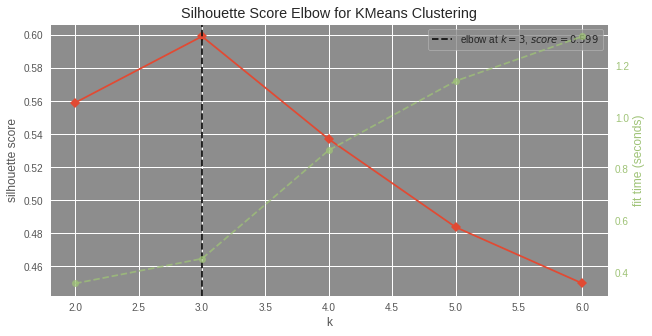

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca2)
visualizer.poof()

In [17]:
from sklearn.cluster import KMeans
model2 = KMeans(3) 
model2.fit(df_pca2) #ON fIT 
y_pred2 = model2.predict(df_pca2)

k_centers2 = model2.cluster_centers_

merge_encode_zero["Cluster_Social"]=y_pred2
merge["Cluster_Social"]=y_pred2


In [22]:

from sklearn.metrics import silhouette_score

silhouette_score(df_pca2, y_pred2)
silhouette_score(W, y_pred2)

0.563405905790562

# not so good clustering 

In [23]:
merge.groupby(['Cluster_Social']).mean()

,HHID,HH_Size,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables,Cluster_consumer,Cluster_consumer_Centroid0
Cluster_Social,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.299553e+08,4.458302,189275.072132,859.606529,570.994925,216.450064,243.871780,279.497895,191.283447,125.405113,208.415487,234.978681,58.629543,239.814788,444.440159,71.860360,143.660894,311.447476,130.867921,104.958841,243.294222,99.993394,136.670417,106.349107,167.249759,345.701312,0.564464,-1493.652159
1,6.354369e+08,4.544703,187023.916549,769.237293,790.974961,199.374781,258.850834,268.088989,181.290480,132.832013,262.676383,230.912799,59.537947,275.858284,421.611006,82.205280,143.297922,319.570547,138.400100,107.712656,333.001689,128.461883,144.659203,147.317958,137.949640,340.722311,0.553533,-1038.374975
2,6.186448e+08,4.700485,205278.505147,829.492257,805.007734,230.555883,302.909796,290.278937,200.929809,160.410458,229.628115,275.551240,62.758351,361.531369,480.885993,111.908351,180.891705,359.050678,136.181601,129.320281,424.699011,142.148112,154.569181,174.372278,178.445513,335.763227,0.488642,1664.398552
